In [1]:
import numpy as np
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Полиномиальная регрессия
Заведём себе многочлен с небольшим шумом и сделаем приближение многочленами разных степеней.

In [2]:
np.random.seed(666)
n = 100

x0, x1 = -0.5, 1.5
poly = [1, 0, -1, 0]
noise = .03
xs = sorted((x1 - x0) * np.random.rand(n) + x0)

ys = np.polyval(poly, xs) + noise*np.random.randn(n)

In [3]:
ys_r = {}

for deg in range(6):
    p = np.polyfit(xs, ys, deg)
    ys_r[deg] = np.polyval(p, xs)
    print(f'{deg}-degree regression: {p}')

0-degree regression: [0.1651523]
1-degree regression: [0.3351852 0.0028903]
2-degree regression: [ 1.47285668 -1.0911025  -0.1942545 ]
3-degree regression: [ 1.01183759 -0.01337944 -0.99994667  0.00122555]
4-degree regression: [-0.00968796  1.03099314 -0.01873632 -1.00403821  0.00180894]
5-degree regression: [-0.1250939   0.29516755  0.87936142 -0.08567635 -0.96939992  0.00438408]


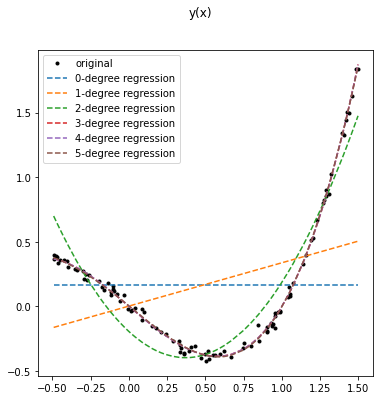

In [4]:
plt.figure(figsize=(6, 6))
plt.suptitle('y(x)')
plt.plot(xs, ys, 'k.', label='original')
for k, v in ys_r.items():
    plt.plot(xs, v, '--', label=f'{k}-degree regression')
plt.legend();

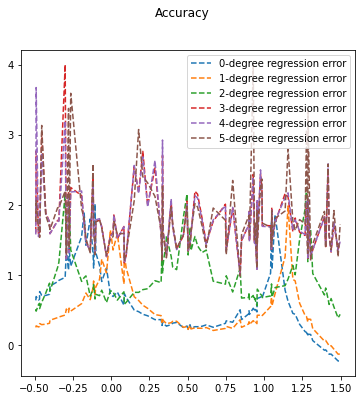

In [5]:
plt.figure(figsize=(6, 6))
plt.suptitle('Accuracy')
for k, v in ys_r.items():
    plt.plot(xs, -np.log10(np.abs(v - ys)), '--', label=f'{k}-degree regression error')
plt.legend();

Видим, что разницы между 3-й, 4-й и 5-й степенями почти и нет (что логично).